<a href="https://colab.research.google.com/github/yonigresearch-wq/ML-workflows/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **We will be exploring image processing**

In [ ]:
import pandas as pd
import numpy as np
from glob import glob # useful for retreiving a specific file type (e.g., .jpeg)
import cv2 # image processing
import matplotlib.pylab as plt # image processing

In [ ]:
# Import cat and dog dataset from kaggle

# Install Kaggle API if not already installed
!pip install kaggle

# Upload kaggle.json (API key)
from google.colab import files
files.upload()

# Move kaggle.json into the correct folder
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d tongpython/cat-and-dog
# Unzip it into /content
!unzip cat-and-dog.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/training_set/training_set/cats/cat.3714.jpg  
  inflating: /content/training_set/training_set/cats/cat.3715.jpg  
  inflating: /content/training_set/training_set/cats/cat.3716.jpg 

In [ ]:
# retrieve and classify .jpg files

dog_files = glob('/content/training_set/training_set/dogs/*.jpg')
cat_files = glob('/content/training_set/training_set/cats/*.jpg')

# 2 ways of reading in images

img_mpl = plt.imread(cat_files[20]) # reads images in (RGB)
img_cv2 = cv2.imread(cat_files[20]) # reads images in (BGR)

img_mpl.shape, type(img_mpl), img_cv2.shape, type(img_cv2)

### We obtain 3-dimensional numpy arrays - The dimensions represent height, width and channels (Red, Green, Blue) of the images

((375, 499, 3), numpy.ndarray, (375, 499, 3), numpy.ndarray)

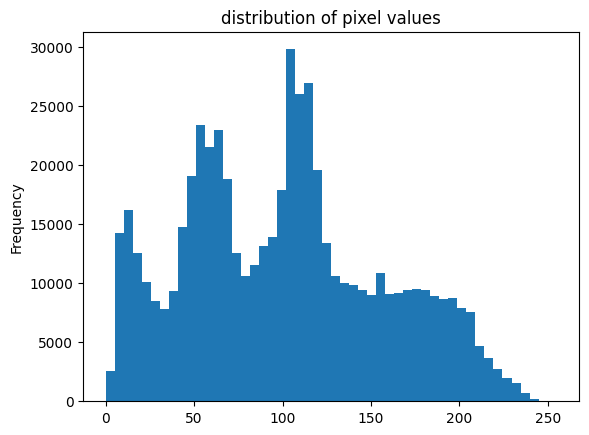

In [ ]:
# Create histogram of pixel distribution within image

pd.Series(img_mpl.flatten()).plot(kind='hist', bins=50, title="distribution of pixel values")
plt.show()

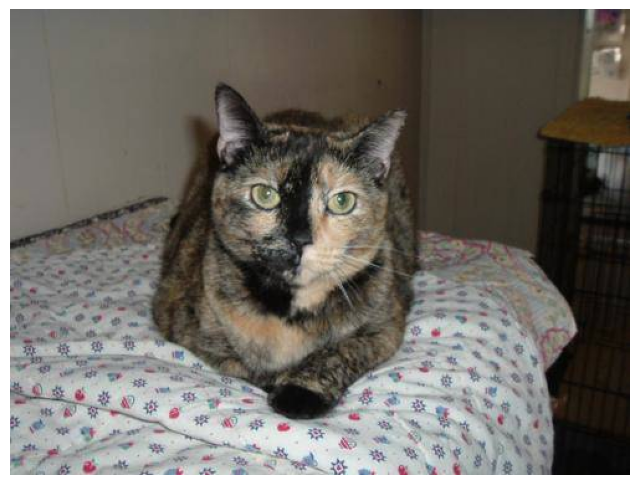

In [ ]:
# Dislay images

fig, ax = plt.subplots(figsize=(8, 7))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()


Text(0.5, 1.0, 'Blue Channel')

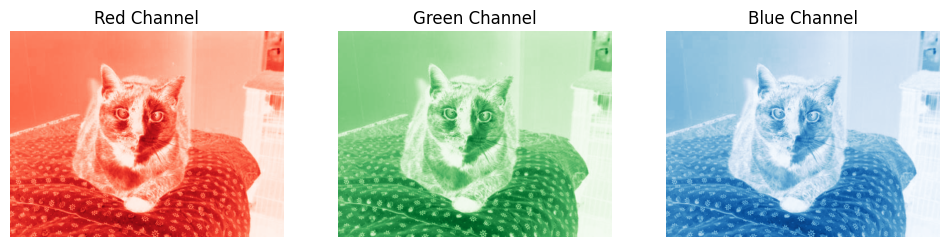

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(img_cv2[:, :, 2], cmap='Reds')
axes[1].imshow(img_cv2[:, :, 1], cmap='Greens')
axes[2].imshow(img_cv2[:, :, 0], cmap='Blues')

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

axes[0].set_title('Red Channel')
axes[1].set_title('Green Channel')
axes[2].set_title('Blue Channel')

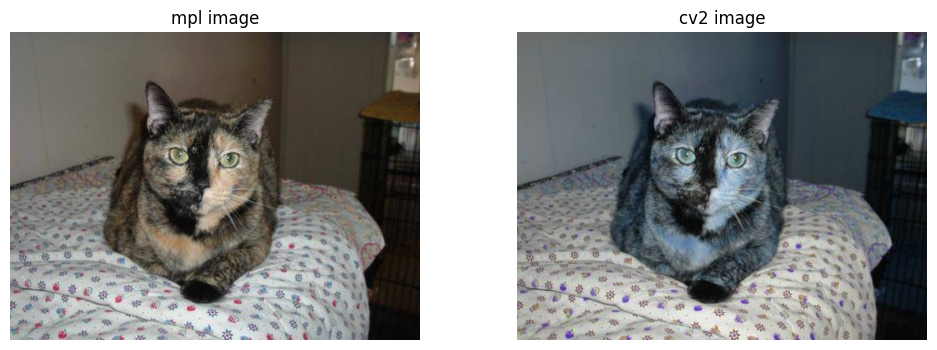

In [ ]:
# Comparison between mpl and cv2 imae reading
# mpl - RGB
# cv2 - BGR

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(img_mpl)
axes[1].imshow(img_cv2)

axes[0].axis('off')
axes[1].axis('off')

axes[0].set_title('mpl image')
axes[1].set_title('cv2 image')

plt.show()

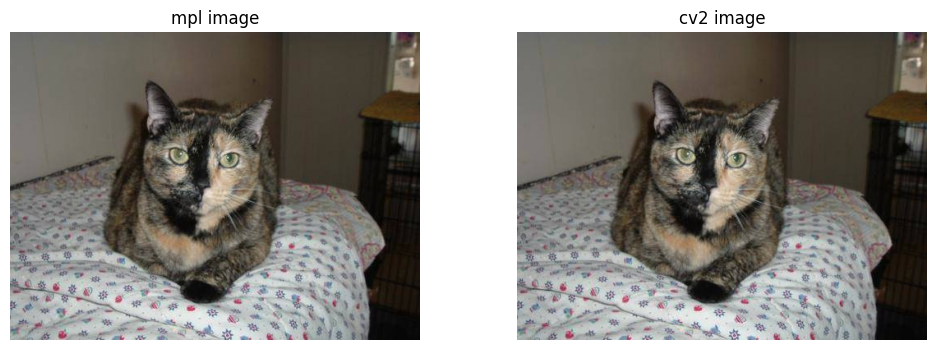

In [ ]:
# We can change the channel order as follows

img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(img_mpl)
axes[1].imshow(img_cv2_rgb)

axes[0].axis('off')
axes[1].axis('off')

axes[0].set_title('mpl image')
axes[1].set_title('cv2 image')

plt.show()

### **Image manipulation**

In [ ]:
dog_img = plt.imread(dog_files[16])
dog_img.shape

(399, 393, 3)

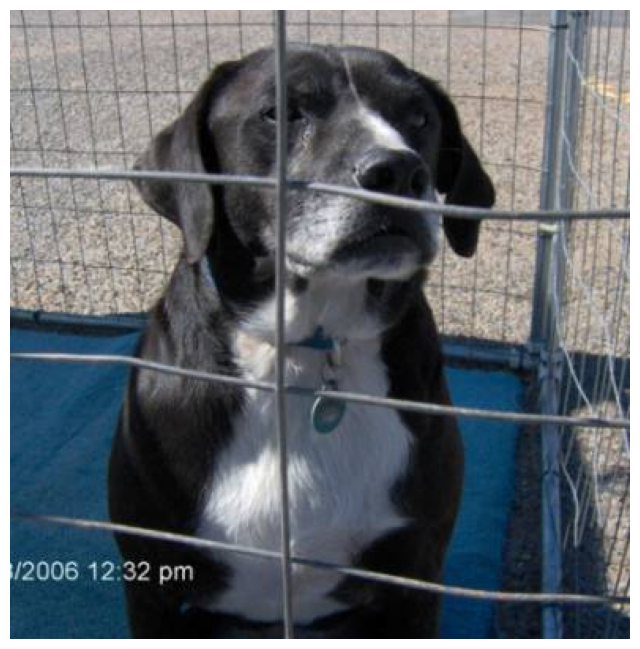

In [ ]:
fig, ax = plt.subplots(figsize=(8, 9))
ax.imshow(dog_img)
ax.axis('off')
plt.show()

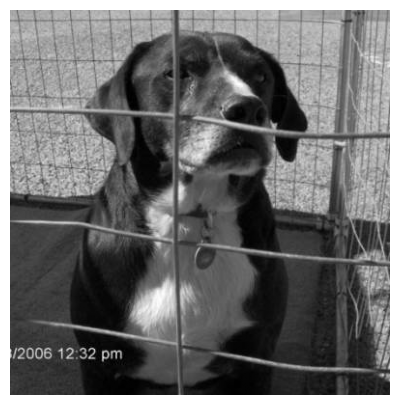

In [ ]:
# Lets convert the image into grayscale

dog_img_gray = cv2.cvtColor(dog_img, cv2.COLOR_RGB2GRAY)
dog_img_gray.shape # 2 dimensional since we only have a single channel (gray)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(dog_img_gray, cmap='gray')
ax.axis('off')
plt.show()

(100, 98, 3)


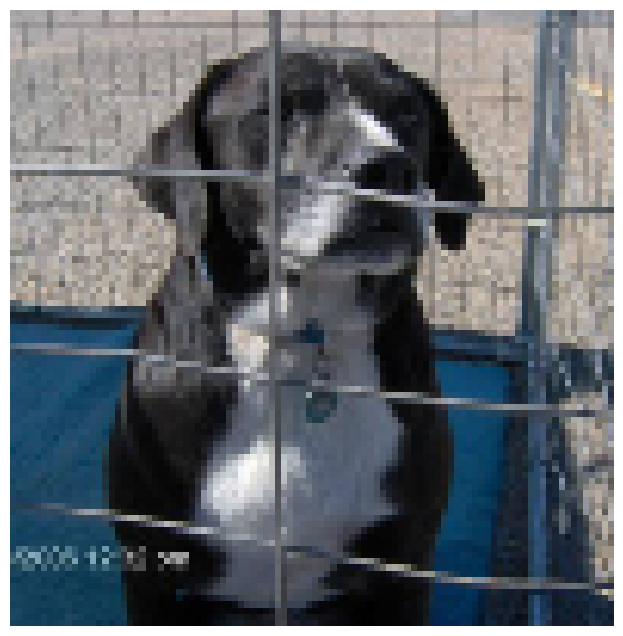

In [ ]:
# Resizing and resclaing of an image - using PCA?
# As we can see, the resized image has much less detail - more pixelated feel

dog_resized1 = cv2.resize(dog_img, (375, 375)) # resize by passing height and width
dog_resized2 = cv2.resize(dog_img, None, fx=0.25, fy=0.25) # resize by propotion relative to original
print(dog_resized2.shape)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(dog_resized2)
ax.axis('off')
plt.show()

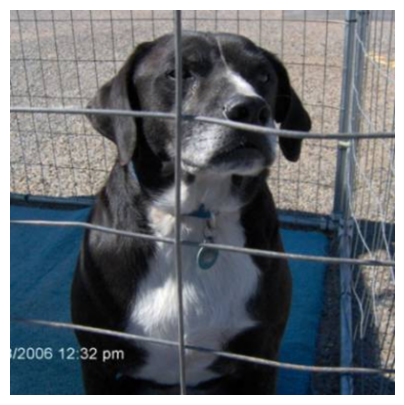

In [ ]:
# Upscaling an image
# When upscaling, we should use interpolation - there are different types

dog_resized3 = cv2.resize(dog_resized1, (5000, 5000), interpolation=cv2.INTER_CUBIC)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(dog_resized3)
ax.axis('off')
plt.show()

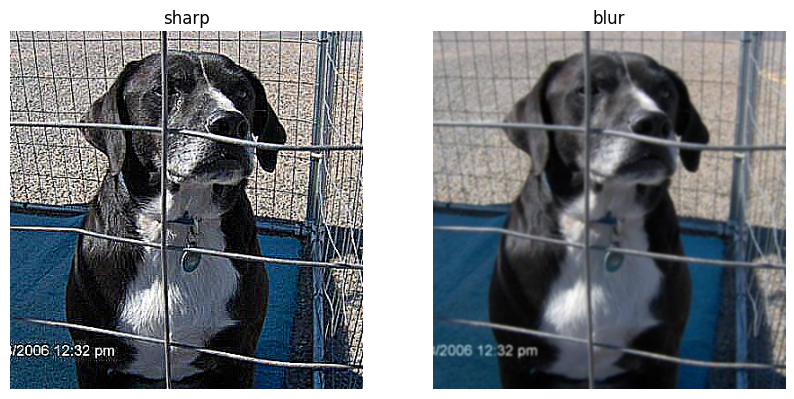

In [ ]:
# Kernels for image manipilation
# kernels can be used as a type of filter

sharpen  = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])
dog_sharp = cv2.filter2D(dog_img, -1, sharpen)

blur = np.ones((3, 3), dtype=np.float32)/9

dog_blur = cv2.filter2D(dog_img, -1, blur)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(dog_sharp)
axes[0].axis('off')
axes[0].set_title('sharp')
axes[1].imshow(dog_blur)
axes[1].axis('off')
axes[1].set_title('blur')
plt.show()



In [ ]:
# Saving images

plt.imsave('dog_sharp.jpg', dog_sharp) # does not provide confirmation
cv2.imwrite('dog_sharp2.jpg', dog_sharp) # provides confirmation that the image has been saved

# We can then download the images from colab to our PC

# files.download("dog_sharp.jpg")
# files.download("dog_sharp2.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>